In [113]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [145]:
df=pd.read_csv('/content/drive/MyDrive/data.csv',index_col=0)

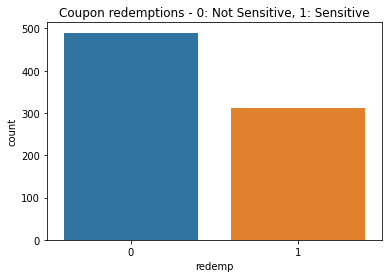

In [146]:
df['redemp']=df['redemp'].astype(str)
redemp_c=df.groupby('redemp')['age_desc'].count().reset_index()
redemp_c.rename(columns={'age_desc':'count'},inplace=True)
sns.barplot(x=redemp_c['redemp'],y=redemp_c['count'])
plt.title('Coupon redemptions - 0: Not Sensitive, 1: Sensitive')
plt.show()

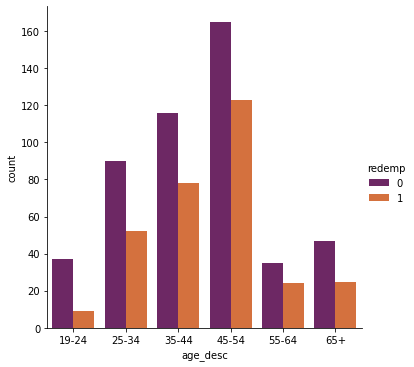

In [147]:
age=df.groupby(['age_desc','redemp'])['total_visits'].count().reset_index()
ax=sns.catplot(x='age_desc',y='total_visits',data=age,hue='redemp',kind='bar',palette='inferno')
ax.set(ylabel='count')

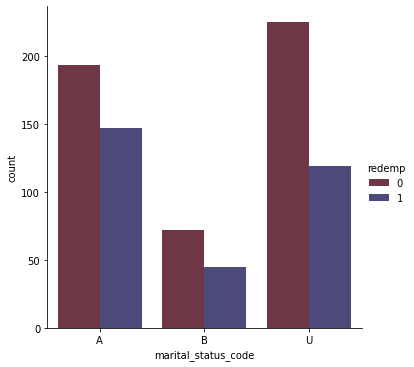

In [148]:
mar=df.groupby(['marital_status_code','redemp'])['total_visits'].count().reset_index()
ax=sns.catplot(x='marital_status_code',y='total_visits',data=mar,hue='redemp',kind='bar',palette='icefire_r')
ax.set(ylabel='count')

In [149]:
inc=df.groupby(['income_desc','redemp'])['total_visits'].count().reset_index()

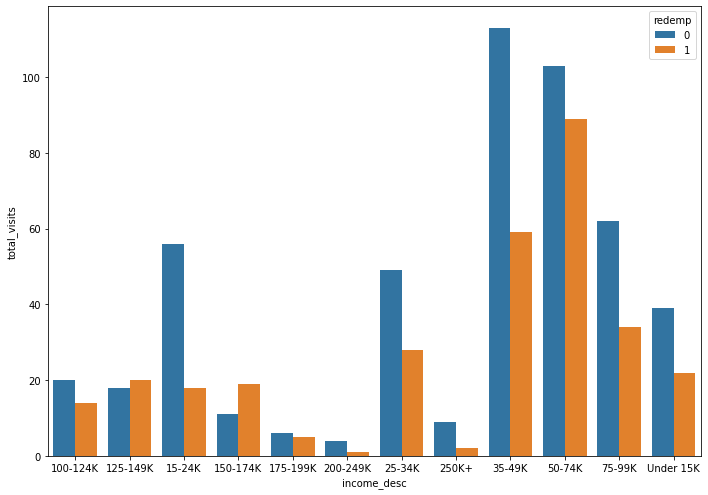

In [150]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x='income_desc',y='total_visits',data=inc,hue='redemp')

[Text(0, 0.5, 'count')]

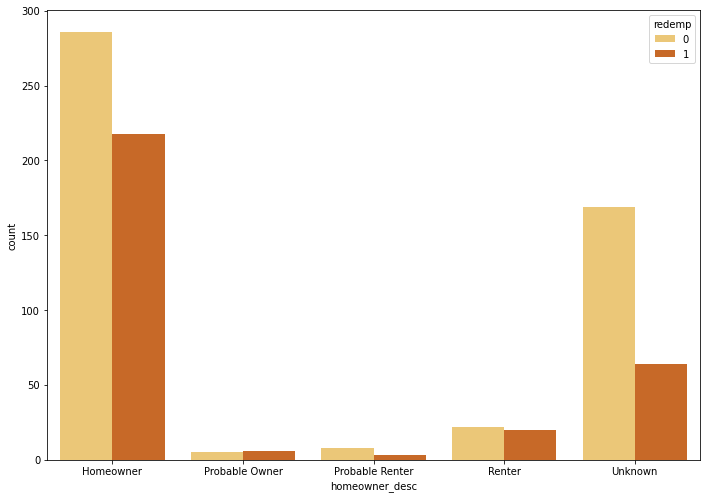

In [151]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
hou=df.groupby(['homeowner_desc','redemp'])['total_visits'].count().reset_index()
ax=sns.barplot(x='homeowner_desc',y='total_visits',data=hou,hue='redemp',palette='YlOrBr')
ax.set(ylabel='count')

[Text(0, 0.5, 'count')]

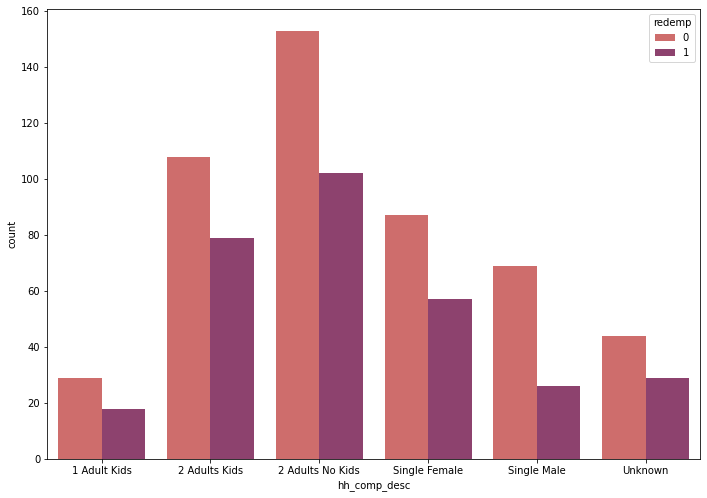

In [152]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
mar=df.groupby(['hh_comp_desc','redemp'])['total_visits'].count().reset_index()
ax=sns.barplot(x='hh_comp_desc',y='total_visits',data=mar,hue='redemp',palette='flare')
ax.set(ylabel='count')

[Text(0, 0.5, 'count')]

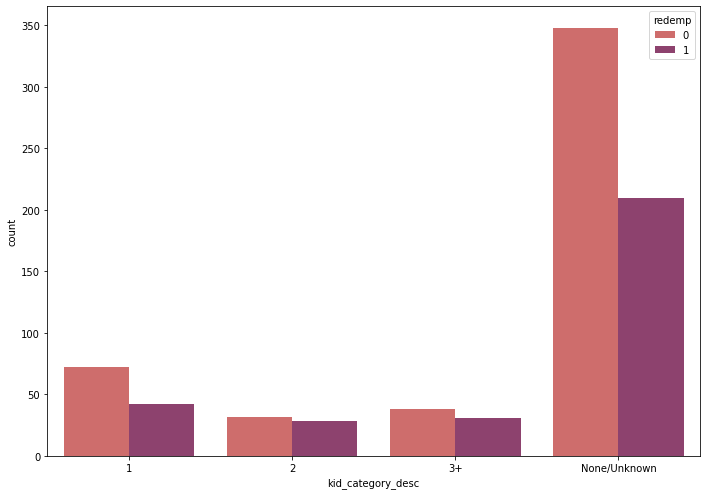

In [153]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
mar=df.groupby(['kid_category_desc','redemp'])['total_visits'].count().reset_index()
ax=sns.barplot(x='kid_category_desc',y='total_visits',data=mar,hue='redemp',palette='flare')
ax.set(ylabel='count')

[Text(0, 0.5, 'count')]

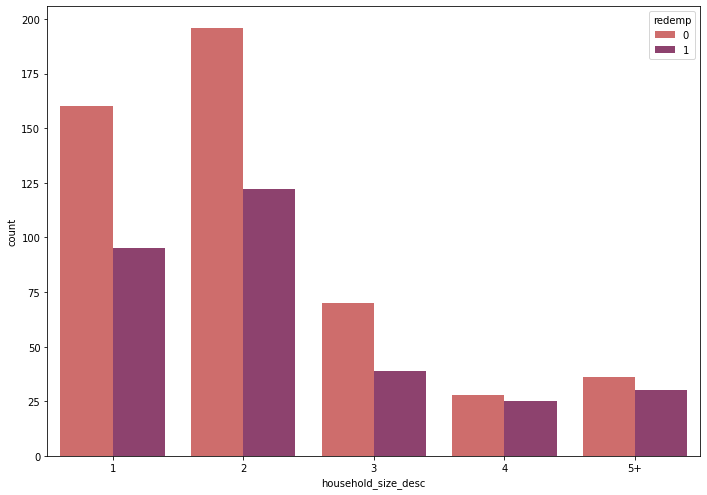

In [154]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
mar=df.groupby(['household_size_desc','redemp'])['total_visits'].count().reset_index()
ax=sns.barplot(x='household_size_desc',y='total_visits',data=mar,hue='redemp',palette='flare')
ax.set(ylabel='count')

In [155]:
df.drop(columns='household_key',inplace=True)

In [156]:
df.describe()

,sales_value,total_visits
count,801.000000,801.000000
mean,5615.126417,175.204744
std,3750.938675,130.901673
min,646.400000,22.000000
25%,2970.100000,96.000000
50%,4676.430000,139.000000
75%,7164.990000,214.000000
max,27859.680000,1223.000000


In [157]:
df

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,sales_value,total_visits,redemp
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,4330.16,86,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,3400.05,59,0
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,5534.97,113,1
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13190.92,275,1
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,1512.02,98,0
...,...,...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2120.93,35,1
797,45-54,A,75-99K,Homeowner,Unknown,3,1,4339.66,63,1
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,7111.98,221,0
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2601.60,172,0


In [158]:
df['income_desc'].unique()

array(['35-49K', '50-74K', '25-34K', '75-99K', 'Under 15K', '100-124K',
       '15-24K', '125-149K', '150-174K', '250K+', '175-199K', '200-249K'],
      dtype=object)

In [159]:
#Encoding age and income as integers
df['age_desc']=df['age_desc'].replace(['19-24','25-34','35-44','45-54','65+','55-64'],[0,1,2,3,4,5])

In [160]:
df['income_desc']=df['income_desc'].replace(['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K','100-124K','125-149K','150-174K','175-199K','200-249K','250K+'],[0,1,2,3,4,5,6,7,8,9,10,11])

In [161]:
df1=df[['marital_status_code','homeowner_desc','hh_comp_desc']]

In [162]:
# onehot=OneHotEncoder()
# feat=onehot.fit_transform(df1).toarray()

In [163]:
# feature_labels=onehot.categories_
# feature_labels = np.array(feature_labels)

In [164]:
df1=df1.astype('category')
df2=pd.get_dummies(df1)

In [165]:
df=df.join(df2,on=df1.index)
df.drop(columns=['marital_status_code','homeowner_desc','hh_comp_desc'],inplace=True)

In [166]:
df['kid_category_desc']=df['kid_category_desc'].replace(['None/Unknown','1','2','3+'],[0,1,2,3])

In [167]:
df['household_size_desc'].unique()

array(['2', '3', '4', '1', '5+'], dtype=object)

In [168]:
df['household_size_desc']=df['household_size_desc'].replace(['2', '3', '4', '1', '5+'],[2,3,4,1,5])

In [169]:
df

,age_desc,income_desc,household_size_desc,kid_category_desc,sales_value,total_visits,redemp,marital_status_code_A,marital_status_code_B,marital_status_code_U,homeowner_desc_Homeowner,homeowner_desc_Probable Owner,homeowner_desc_Probable Renter,homeowner_desc_Renter,homeowner_desc_Unknown,hh_comp_desc_1 Adult Kids,hh_comp_desc_2 Adults Kids,hh_comp_desc_2 Adults No Kids,hh_comp_desc_Single Female,hh_comp_desc_Single Male,hh_comp_desc_Unknown
0,4,3,2,0,4330.16,86,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,3,4,2,0,3400.05,59,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,2,3,1,5534.97,113,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,1,5,4,2,13190.92,275,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4,3,4,1,0,1512.02,98,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2,4,2,0,2120.93,35,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
797,3,5,3,1,4339.66,63,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
798,3,3,1,0,7111.98,221,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
799,1,4,2,0,2601.60,172,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


In [170]:
df.columns

Index(['age_desc', 'income_desc', 'household_size_desc', 'kid_category_desc',
       'sales_value', 'total_visits', 'redemp', 'marital_status_code_A',
       'marital_status_code_B', 'marital_status_code_U',
       'homeowner_desc_Homeowner', 'homeowner_desc_Probable Owner',
       'homeowner_desc_Probable Renter', 'homeowner_desc_Renter',
       'homeowner_desc_Unknown', 'hh_comp_desc_1 Adult Kids',
       'hh_comp_desc_2 Adults Kids', 'hh_comp_desc_2 Adults No Kids',
       'hh_comp_desc_Single Female', 'hh_comp_desc_Single Male',
       'hh_comp_desc_Unknown'],
      dtype='object')

In [172]:
df2=df[['age_desc', 'income_desc', 'household_size_desc', 'kid_category_desc', 'sales_value', 'total_visits', 'redemp']]

In [173]:
df2.corr()

,age_desc,income_desc,household_size_desc,kid_category_desc,sales_value,total_visits
age_desc,1.000000,0.028448,-0.111953,-0.167228,-0.040911,-0.001743
income_desc,0.028448,1.000000,0.123411,0.073695,0.264052,-0.027554
household_size_desc,-0.111953,0.123411,1.000000,0.924278,0.144534,-0.025622
kid_category_desc,-0.167228,0.073695,0.924278,1.000000,0.139557,-0.004535
sales_value,-0.040911,0.264052,0.144534,0.139557,1.000000,0.539211
total_visits,-0.001743,-0.027554,-0.025622,-0.004535,0.539211,1.000000


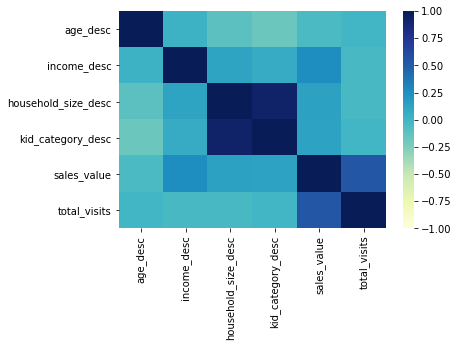

In [174]:
sns.heatmap(df2.corr(),cmap="YlGnBu",vmin=-1, vmax=1)

In [178]:
#Household Size desc highly correlated with Kids category, removing it.

df.drop(columns='household_size_desc',inplace=True)

In [180]:
df.columns

Index(['age_desc', 'income_desc', 'kid_category_desc', 'sales_value',
       'total_visits', 'redemp', 'marital_status_code_A',
       'marital_status_code_B', 'marital_status_code_U',
       'homeowner_desc_Homeowner', 'homeowner_desc_Probable Owner',
       'homeowner_desc_Probable Renter', 'homeowner_desc_Renter',
       'homeowner_desc_Unknown', 'hh_comp_desc_1 Adult Kids',
       'hh_comp_desc_2 Adults Kids', 'hh_comp_desc_2 Adults No Kids',
       'hh_comp_desc_Single Female', 'hh_comp_desc_Single Male',
       'hh_comp_desc_Unknown'],
      dtype='object')

In [182]:
df=df.rename(columns={'marital_status_code_A':'mar_A','marital_status_code_B':'mar_B','marital_status_code_U': 'mar_U', \
                   'homeowner_desc_Homeowner':'homeown','homeowner_desc_Probable Owner':'probown',\
                   'homeowner_desc_Probable Renter':'probren','homeowner_desc_Renter':'homren',\
                   'homeowner_desc_Unknown':'homown','hh_comp_desc_1 Adult Kids':'1ak',\
                   'hh_comp_desc_2 Adults Kids':'2ak','hh_comp_desc_2 Adults No Kids':'2a',\
                   'hh_comp_desc_Single Female':'1f','hh_comp_desc_Single Male':'1m','hh_comp_desc_Unknown':'unknown_hh'})

In [183]:
df

,age_desc,income_desc,kid_category_desc,sales_value,total_visits,redemp,mar_A,mar_B,mar_U,homeown,probown,probren,homren,homown,1ak,2ak,2a,1f,1m,unknown_hh
0,4,3,0,4330.16,86,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,3,4,0,3400.05,59,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,2,1,5534.97,113,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,1,5,2,13190.92,275,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4,3,4,0,1512.02,98,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2,4,0,2120.93,35,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
797,3,5,1,4339.66,63,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
798,3,3,0,7111.98,221,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
799,1,4,0,2601.60,172,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


In [186]:
df.to_csv('/content/drive/MyDrive/data_pred.csv',index=False)